In [2]:
import pandas as pd
from sklearn import model_selection
import lightgbm as lgb
import matplotlib.pyplot as plt


In [3]:
scored_test_data = pd.read_csv('preped_test_data_wth_dummies.csv', index_col=0)
scored_train_data = pd.read_csv('preped_train_data_wth_dummies.csv', index_col=0)

scored_test_data = scored_test_data.reset_index(drop = True)
scored_train_data = scored_train_data.reset_index(drop = True)

In [4]:
X_train = scored_train_data.iloc[:, 3:len(scored_train_data.columns)-1]
Y_train = scored_train_data.iloc[:, len(scored_train_data.columns)-1:]

In [5]:
X_test = scored_test_data.iloc[:, 3:len(scored_test_data.columns)-1]
Y_test = scored_test_data.iloc[:, len(scored_test_data.columns)-1:]

In [6]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "min_child_weight" : 50,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : 10
    }

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result





In [7]:
cols_to_use = ['log_Followers',
       'log_Brand Appearance', 'log_Avg Price', 'Avg Discount',
       'log_First Day Revenue', 'Conversion', 'Recency', 'Frequency',
       'Monetary', 'Artisanal', 'B-Corporation', 'Bien-être', 'Bio',
       'Biodégradable', 'Cadeau idéal', 'Concept original', 'Durable',
       'Exclusivité Choose', 'Fabrication à la demande', 'Fait main',
       'Gluten Free', 'Iconique', 'Inclusive', 'Innovation',
       'La Fournée Ulule', 'Made in Europe', 'Made in France', 'Naturel',
       'Oeko-Tex', 'Premium', 'Recyclable', 'Savoir-faire',
       'Socialement engagée', 'Série limitée', 'Tendance', 'Upcycling',
       'Vegan', 'ZéroDéchet', 'Éco-friendly', 'Accessoires', 'Beauté',
       'Bibliothèque', 'Bien-Être', 'Bijoux', 'Buanderie', 'Chambre',
       'Chaussures', 'Cuisine', 'Cures', 'Expériences', 'Hygiène', 'Lingerie',
       'Maroquinerie', 'Outdoor', 'Prêt-à-porter', 'Salon', 'Soins',
       'Sportswear']

train_X = scored_train_data[cols_to_use]
test_X = scored_test_data[cols_to_use]
train_y = scored_train_data['interaction'].values

In [8]:
pred_test = 0
kf = model_selection.KFold(n_splits=5, random_state=2018, shuffle=True)
for dev_index, val_index in kf.split(scored_train_data):
    dev_X, val_X = train_X.loc[dev_index,:], train_X.loc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    
    pred_test_tmp, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test_X)
    pred_test += pred_test_tmp
pred_test /= 5.
    

/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation(

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.929182
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.711538
[LightGBM] [Debug] init for col-wise cost 0.022584 seconds, init for row-wise cost 0.040010 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 143376, number of used features: 58
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation(

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.929147
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.711513
[LightGBM] [Debug] init for col-wise cost 0.012844 seconds, init for row-wise cost 0.016891 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1619
[LightGBM] [Info] Number of data points in the train set: 143377, number of used features: 58
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation(

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.929205
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.711566
[LightGBM] [Debug] init for col-wise cost 0.014512 seconds, init for row-wise cost 0.028929 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 143377, number of used features: 58
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation(

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.929223
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.711572
[LightGBM] [Debug] init for col-wise cost 0.012948 seconds, init for row-wise cost 0.017869 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 143377, number of used features: 58
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/priscilleerulin/.pyenv/versions/3.9.16/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation(

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.929179
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.711539
[LightGBM] [Debug] init for col-wise cost 0.029496 seconds, init for row-wise cost 0.029902 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1625
[LightGBM] [Info] Number of data points in the train set: 143377, number of used features: 58
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.483209
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 

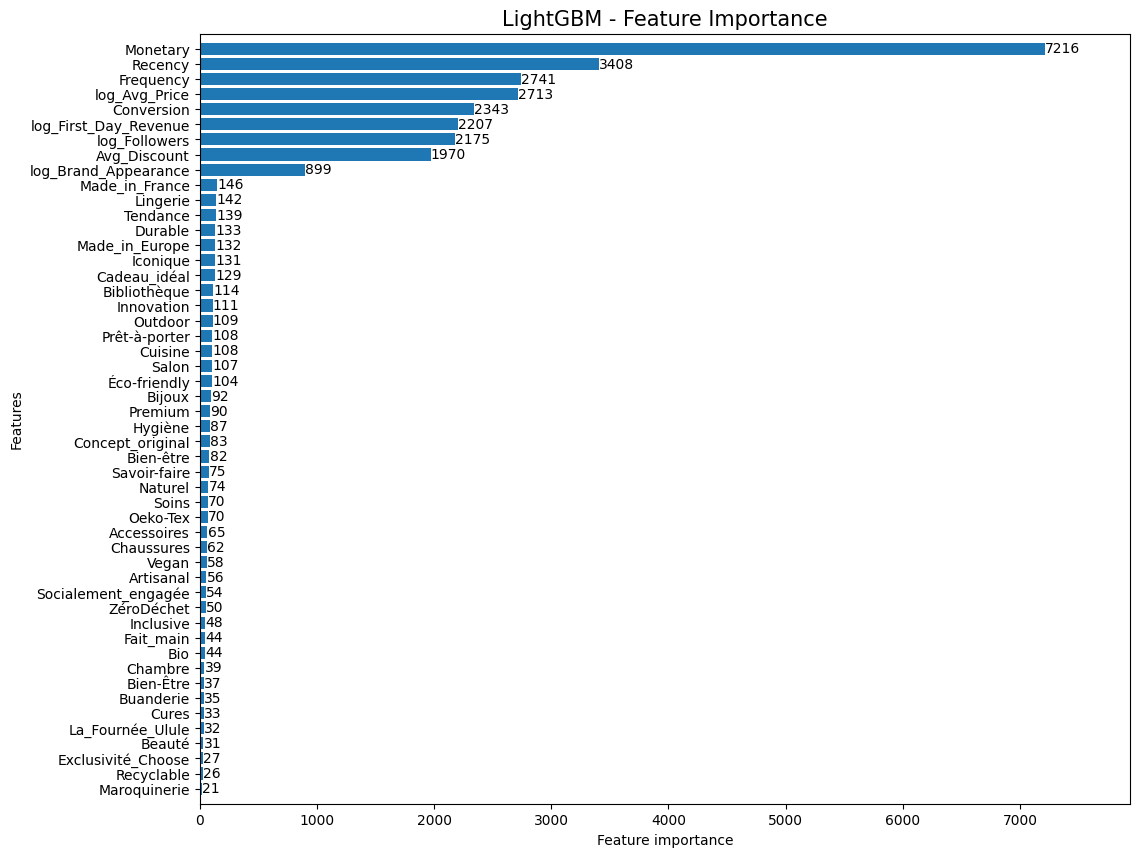

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()